<a href="https://colab.research.google.com/github/emanuel379/-Introducao-a-Ciencia-de-Dados/blob/main/Projeto_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
random.seed(42)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import normalized_mutual_info_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn import model_selection, tree, preprocessing, metrics, linear_model

In [ ]:
train = pd.read_csv('train.csv', header=(0))
test = pd.read_csv('test.csv', header=(0))

print("Número de linhas e colunas no conjunto de treinamento:", train.shape)
print("Número de linhas e colunas no conjunto de teste:", test.shape)
attributes = list(train.columns)
train.head(10)

Número de linhas e colunas no conjunto de treinamento: (891, 12)
Número de linhas e colunas no conjunto de teste: (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [ ]:
# Eliminando linhas e colunas consideradas desnecessárias

train.drop(['PassengerId','Name', 'Ticket', 'Cabin'],axis = 1, inplace = True)

PassengerId_test = test['PassengerId']
test.drop(['PassengerId','Name', 'Ticket', 'Cabin'],axis = 1, inplace = True)

In [ ]:
test.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
5,3,male,14.0,0,0,9.2250,S
6,3,female,30.0,0,0,7.6292,Q
7,2,male,26.0,1,1,29.0000,S
8,3,female,18.0,0,0,7.2292,C
9,3,male,21.0,2,0,24.1500,S


In [ ]:
# Verificando a presença de valores faltantes

train.isnull().sum().sort_values(ascending=False)

Age         177
Embarked      2
Survived      0
Pclass        0
Sex           0
SibSp         0
Parch         0
Fare          0
dtype: int64

In [ ]:
test.isnull().sum().sort_values(ascending=False)

Age         86
Fare         1
Pclass       0
Sex          0
SibSp        0
Parch        0
Embarked     0
dtype: int64

In [ ]:
# Preenchendo os valores faltantes com média, moda e mediana

train['Age'] = train['Age'].fillna(train['Age'].mean())
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
train['Fare'] = train['Fare'].fillna(train['Fare'].median())

test['Age'] = test['Age'].fillna(test['Age'].mean())
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode()[0])
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

<function matplotlib.pyplot.show(*args, **kw)>

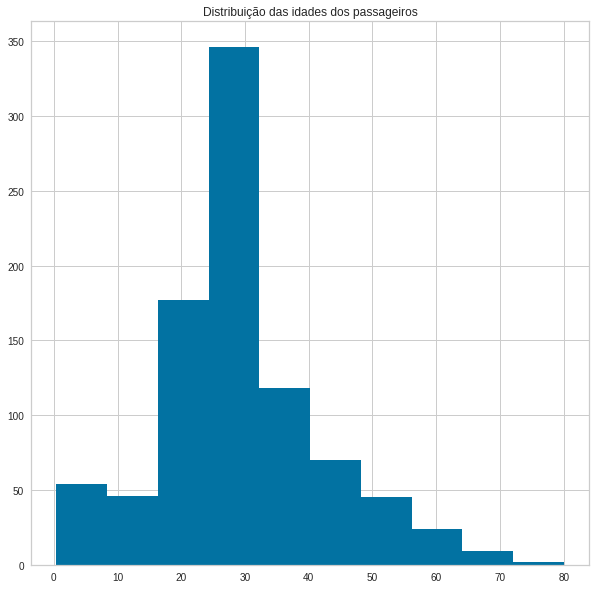

In [ ]:
# Analisando a distribuição de uma variável com um gráfico

y = np.array(train['Age'])

plt.figure(figsize=(10, 10))
plt.title('Distribuição das idades dos passageiros')
plt.hist(y)
plt.show

In [ ]:
# Transformando atributos nominais em numéricos

train_original = train
train = pd.get_dummies(train)
train.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,0,3,35.000000,0,0,8.0500,0,1,0,0,1
5,0,3,29.699118,0,0,8.4583,0,1,0,1,0
6,0,1,54.000000,0,0,51.8625,0,1,0,0,1
7,0,3,2.000000,3,1,21.0750,0,1,0,0,1
8,1,3,27.000000,0,2,11.1333,1,0,0,0,1
9,1,2,14.000000,1,0,30.0708,1,0,1,0,0


In [ ]:
test = pd.get_dummies(test)
test.head(10)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1
5,3,14.0,0,0,9.2250,0,1,0,0,1
6,3,30.0,0,0,7.6292,1,0,0,1,0
7,2,26.0,1,1,29.0000,0,1,0,0,1
8,3,18.0,0,0,7.2292,1,0,1,0,0
9,3,21.0,2,0,24.1500,0,1,0,0,1


In [ ]:
# Convertendo dados em numpy para classificação

data_train = train.to_numpy()
nrow,ncol = data_train.shape
y_train = data_train[:,0]
X_train = data_train[:,1:ncol]

data_test = test.to_numpy()
nrow,ncol = data_test.shape
y_test = data_test[:,0]
X_test = data_test[:,1:ncol]

In [ ]:
# Para o conjunto de teste

data_test = test.to_numpy()
X_test = data_test

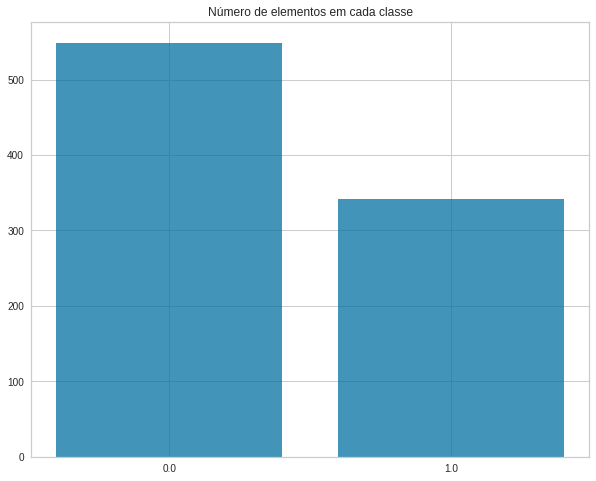

In [ ]:
# Verificando se as  classes estão balanceadas

classes = y_train
cl = np.unique(classes)
ncl = np.zeros(len(cl))
for i in np.arange(0, len(cl)):
    a = classes == cl[i]
    ncl[i] = len(classes[a])

numbers = np.arange(0, len(cl))
plt.figure(figsize = (10, 8))
plt.bar(numbers, ncl,  alpha=.75)
plt.xticks(numbers, cl)
plt.title('Número de elementos em cada classe')
plt.show(True)

In [ ]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
# Normalizando os dados

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

print('Dados transformados:')
print('Media: ', np.mean(X_train, axis = 0))
print('Desvio Padrao:', np.std(X_train, axis = 0))

print('Dados transformados:')
print('Media: ', np.mean(X_test, axis = 0))
print('Desvio Padrao:', np.std(X_test, axis = 0))

Dados transformados:
Media:  [-8.77213254e-17  2.23290646e-16  4.38606627e-17  5.38289951e-17
  3.98733297e-18  3.98733297e-17 -1.15632656e-16 -1.99366649e-17
  0.00000000e+00 -8.37339924e-17]
Desvio Padrao: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Dados transformados:
Media:  [-0.05156969  0.04413122 -0.06863058  0.01334498  0.06790076  0.02349348
 -0.02349348  0.14180391  0.08409087 -0.1771445 ]
Desvio Padrao: [1.00625661 0.97111866 0.81269066 1.21679298 1.12317842 1.00695788
 1.00695788 1.09804783 1.11376674 1.07106262]


# Realizando a análise descritiva dos dados

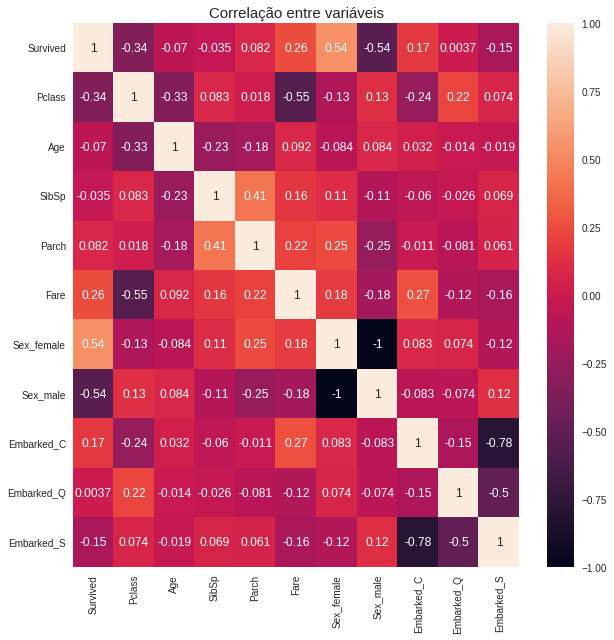

In [ ]:
# Observando a correlação entre as variáveis

plt.figure(figsize = (10, 10))
sns.heatmap(train.corr(), annot = True)
plt.title('Correlação entre variáveis', fontsize=15)
plt.show()


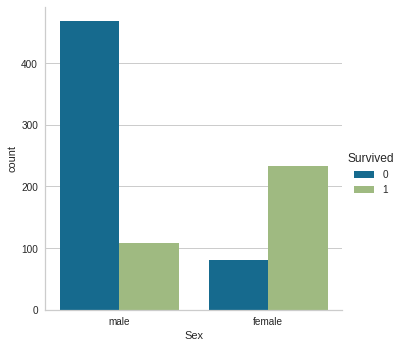

In [ ]:
# Observando a taxa de sobrevivência em função do sexo

sns.catplot(x ="Sex", hue ="Survived",
kind ="count", data = train_original)

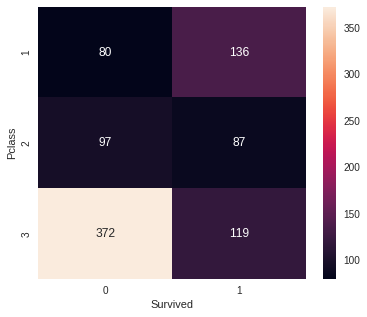

In [ ]:
# Analizando a mortandade de passageiros por classe

plt.figure(figsize = (6, 5))
group = train_original.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
sns.heatmap(pclass_survived, annot = True, fmt ="d")

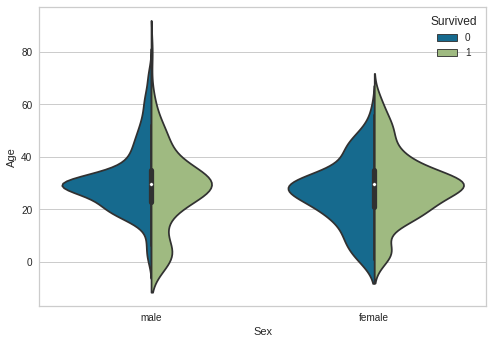

In [ ]:
# Analizando os sobreviventes por sexo e faixa etária a partir de um gráfico de violino

sns.violinplot(x ="Sex", y ="Age", hue ="Survived",
data = train_original, split = True)

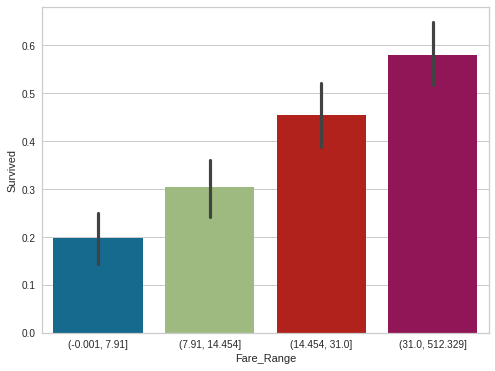

In [ ]:
# Analizando a chance de sobrevivência com base no preço pago pela entrada

plt.figure(figsize = (8, 6))

# Dividindo os preços em 4 faixas

train_original['Fare_Range'] = pd.qcut(train_original['Fare'], 4)

# Barplot - Mostra valores aproximados com base na altura das barras

sns.barplot(x ='Fare_Range', y ='Survived',
data = train_original)

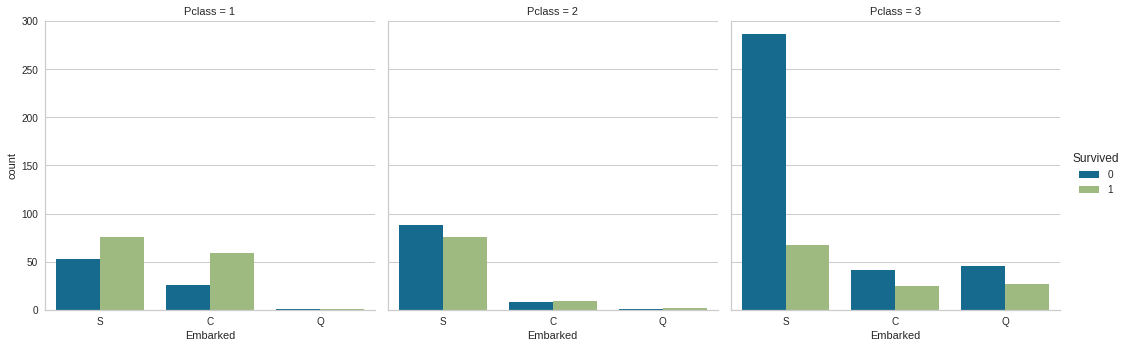

In [ ]:
# Conntabilizando o número de mortos e sobreviventes com base na classe e local de embarque

sns.catplot(x ='Embarked', hue ='Survived',
kind ='count', col ='Pclass', data = train_original)

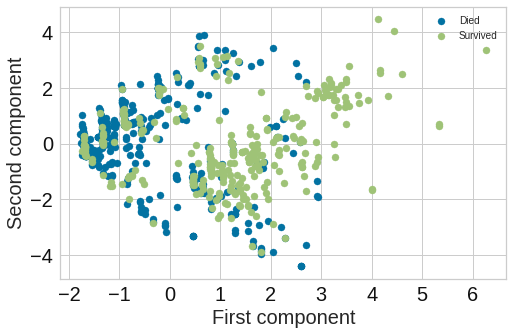

In [ ]:
# Realizando teste PCA e observando o quão distintos/ separados são nossos dados

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_train)

classes = np.unique(y_train)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
aux = 0
plt.figure(figsize=(8,5))
for c in classes:
    if c == 1:
        lb = 'Survived'
    else:
        lb = 'Died'
    nodes = np.where(y_train == c)
    plt.scatter(pca_result[nodes,0], pca_result[nodes,1], s=50, color = colors[aux],
                label = lb)
    aux = aux + 1
plt.legend()
plt.xlabel("First component", fontsize=20)
plt.ylabel("Second component", fontsize=20)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.show(True)

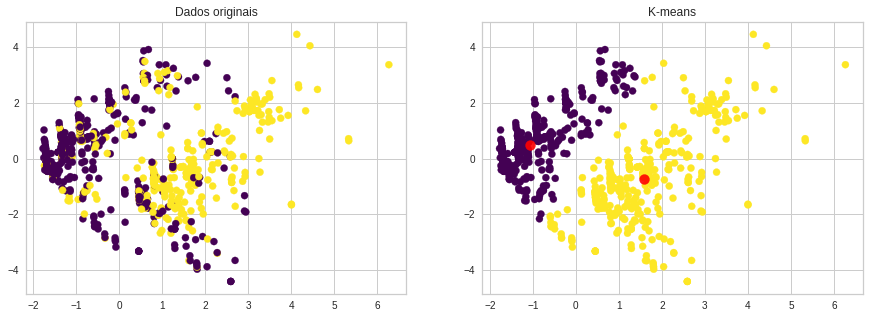

In [ ]:
# Realizando o agrupamento usando o método k-means

k = 2 # numero de clusters a serem identificados

# define o método com k clusters
kmeans = KMeans(n_clusters=k)

# realiza o ajuste considerando os dados X
kmeans.fit(pca_result)

# faz a predição, identificando os clusters
y_km = kmeans.fit_predict(pca_result)

plt.figure(figsize=(15,5))
# mostra o primeiro gráfico
plt.subplot(1, 2, 2)
plt.scatter(pca_result[:,0], pca_result[:,1], c=y_km, cmap='viridis', s=50)
plt.title('K-means')
centers = kmeans.cluster_centers_

# mostra os centróides obtidos
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.9);

# mostra o segundo gráfico
plt.subplot(1,2, 1)
plt.scatter(pca_result[:,0], pca_result[:,1], c=y_train, cmap='viridis', s=50)
plt.title('Dados originais')
plt.show(True)


In [ ]:
# Calculando a informação mútua normalizada

print('Mutual information score:',
      normalized_mutual_info_score(y_km, y_train, average_method='arithmetic'))

Mutual information score: 0.19006340716315032


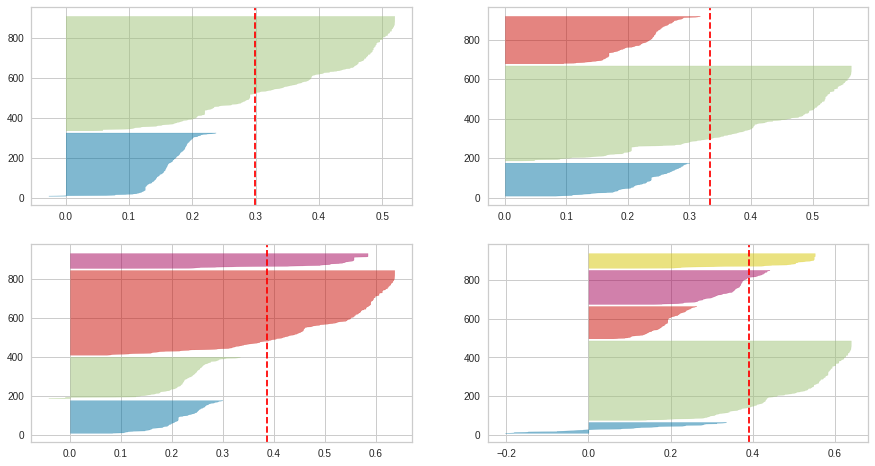

In [ ]:
# Encontrando o número ideal de clusters para k means

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_train)

Observamos que, nesse caso k = 3 seria o mais indicado por apresentar formato mais uniforme e bem definidode.

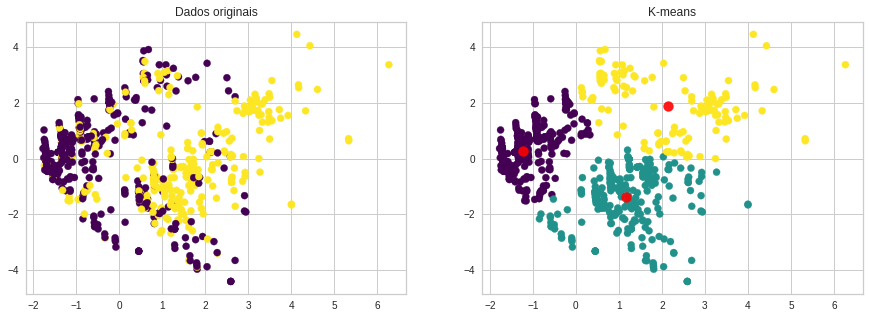

In [ ]:
# Ajustando para o melhor k-means

k = 3 # numero de clusters a serem identificados

# define o método com k clusters
kmeans = KMeans(n_clusters=k)

# realiza o ajuste considerando os dados X
kmeans.fit(pca_result)

# faz a predição, identificando os clusters
y_km = kmeans.fit_predict(pca_result)

plt.figure(figsize=(15,5))
# mostra o primeiro gráfico
plt.subplot(1, 2, 2)
plt.scatter(pca_result[:,0], pca_result[:,1], c=y_km, cmap='viridis', s=50)
plt.title('K-means')
centers = kmeans.cluster_centers_

# mostra os centróides obtidos
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.9);

# mostra o segundo gráfico
plt.subplot(1,2, 1)
plt.scatter(pca_result[:,0], pca_result[:,1], c=y_train, cmap='viridis', s=50)
plt.title('Dados originais')
plt.show(True)


# Seleção e ajuste do modelo

In [ ]:
X = train.drop('Survived', axis=1)
y = train.Survived
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

LRM = LinearRegression().fit(X_train, y_train)
LR = LogisticRegression().fit(X_train, y_train)
KNN = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)
gaussian = GaussianNB().fit(X_train, y_train)
RF = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)
svc = SVC().fit(X_train, y_train)

models = [LRM, LR, KNN, gaussian, RF, svc]

comparison = pd.DataFrame({
    'Model': ['LRM',
              'Logistic Regression',
              'KNN',
              'Naive Bayes',
              'Random Forest',
              'SVC'],
    'Score': [i.score(X_train, y_train) for  i in models],
    'MSE': [metrics.mean_squared_error(y_test, i.predict(X_test)) for i in models]})

comparison_df = comparison.sort_values(by='Score', ascending=False).reset_index(drop=True).set_index('Model')

comparison_df.iloc[:]

,Score,MSE
Model,,
Random Forest,0.968575,5.000000
KNN,0.842873,4.724880
SVC,0.842873,4.940191
Logistic Regression,0.800224,4.732057
Naive Bayes,0.791246,4.617225
LRM,0.398159,4.519895


# Classificação

Knn

In [ ]:
y_pred = KNN.predict(X_test)
y_pred = np.array(y_pred, dtype = int)
prediction = pd.DataFrame()
prediction['PassengerId'] = PassengerId_test
prediction['Survived'] = y_pred

prediction.to_csv('Titanic-KNN.csv', index = False)

Random Forest

In [ ]:
y_pred = RF.predict(X_test)
y_pred = np.array(y_pred, dtype = int)
prediction = pd.DataFrame()
prediction['PassengerId'] = PassengerId_test
prediction['Survived'] = y_pred

prediction.to_csv('Titanic-RF.csv', index = False)

Logistic Regression

In [ ]:
y_pred = LR.predict(X_test)
y_pred = np.array(y_pred, dtype = int)
prediction = pd.DataFrame()
prediction['PassengerId'] = PassengerId_test
prediction['Survived'] = y_pred

prediction.to_csv('Titanic-LR.csv', index = False)

Linear Regression

In [ ]:
y_pred = LRM.predict(X_test)
y_pred = np.array(y_pred, dtype = int)
prediction = pd.DataFrame()
prediction['PassengerId'] = PassengerId_test
prediction['Survived'] = y_pred

prediction.to_csv('Titanic-LRM.csv', index = False)

Naive Bayes

In [ ]:
y_pred = gaussian.predict(X_test)
y_pred = np.array(y_pred, dtype = int)
prediction = pd.DataFrame()
prediction['PassengerId'] = PassengerId_test
prediction['Survived'] = y_pred

prediction.to_csv('Titanic-NB.csv', index = False)

SVC

In [ ]:
y_pred = svc.predict(X_test)
y_pred = np.array(y_pred, dtype = int)
prediction = pd.DataFrame()
prediction['PassengerId'] = PassengerId_test
prediction['Survived'] = y_pred

prediction.to_csv('Titanic-SVC.csv', index = False)